# Word Embedding
- 텍스트 데이터를 벡터 형태로 표현하는 방법으로, 단어 간의 의미적 관계와 문맥을 수치화하는 기법
- 단어들을 의미있는 실수로 구성된 밀집 벡터(Dense vector)의 형태로 표현하는 방법
- 단어를 고차원의 희소 벡터(예: One-Hot Encoding) 대신 저차원의 밀집 벡터(Dense Vector)로 변환하여, 단어 간 유사성을 효율적으로 계산하고 학습에 활용
- 단어 벡터의 차원은 일반적으로 50~300으로 설정, One-Hot Encoding의 고차원 문제를 해결
- 단어 간의 의미적 관계를 밀집 벡터에 일반화


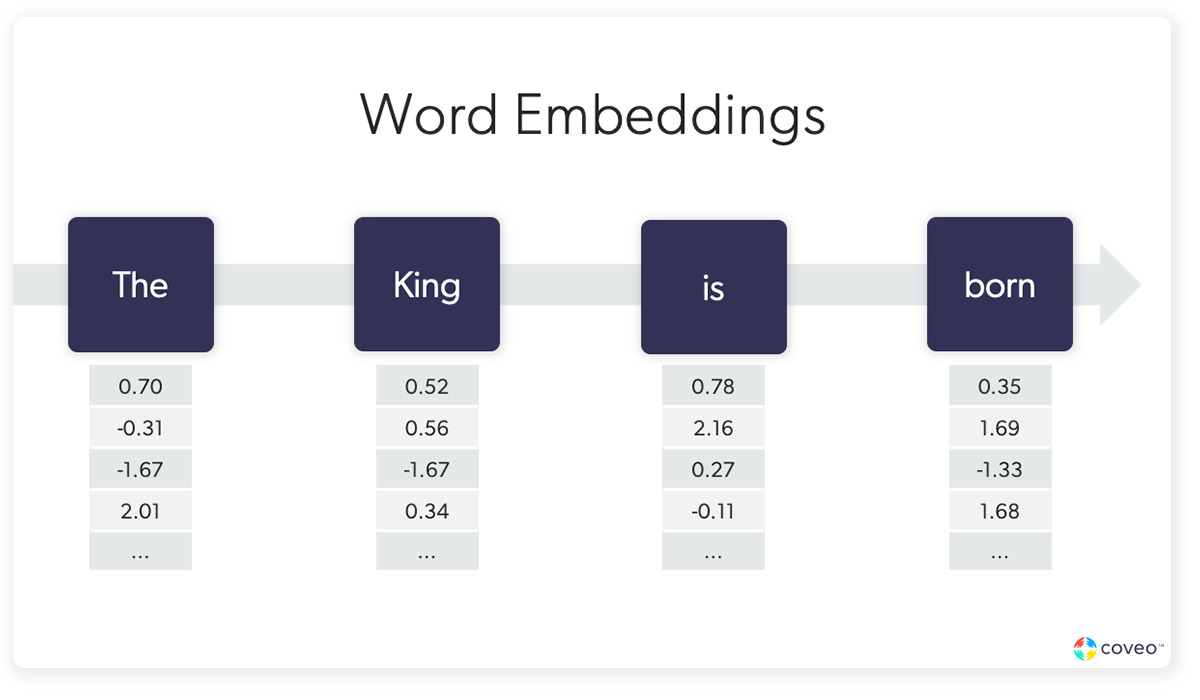

## One-Hot vector vs Embedding vector
- One-Hot vector
    - 고차원
    - 희소 표현
    - 값이 0 또는 1
- Embedding vector
    - 저차원
    - 밀집 표현
    - 값이 실수
    - 학습을 통해 얻을 수 있음

## Word Embedding이 필요한 이유
- One-Hot Encoding의 한계
    - 단어 간 의미적 관계를 반영하지 못함
    - 벡터가 매우 고차원이 되고 희소(sparse)하여 계산 효율성이 떨어짐
- 의미적 관계 표현
    - Word Embedding은 단어 간의 의미적 유사성과 문맥적 정보를 반영
- 효율적 계산
    - 저차원의 밀집 벡터를 사용하여 NLP 모델의 학습 속도와 정확도를 향상

## Word Embedding의 활용
- 단어 유사도 계산
    - 단어 간 의미적 유사성을 벡터 공간에서 계산
    - 예: `cosine_similarity(vec("king"), vec("queen"))`
- 텍스트 분류 및 감성 분석
    - 단어 임베딩을 입력으로 사용해 문서나 문장의 감정 분류 수행
- 질의 응답 및 검색
    - 질의어와 문서 간의 유사도를 계산해 관련 문서 검색

# Word2Vec
- 텍스트 데이터를 학습하여 각 단어를 저차원 밀집 벡터(Dense Vector)로 변환하는 기법
- 단어 임베딩을 목적으로 구현된 신경망 모형
    - Word2Vec은 예측 기반 모델로, 단어 간의 문맥적 관계를 학습
    - 벡터 공간에서 단어 간의 의미적 관계와 문맥 정보를 학습
- CBOW 또는 Skip-gram 방식으로 학습하여 단어를 임베딩




## Word2Vec 알고리즘
- Continuous Bag of Words (CBOW)
    - 주변 단어(문맥)로 중심 단어를 예측
    - 예: "The cat sits on the mat" → 문맥: ["The", "cat", "on", "the", "mat"] → 중심 단어: "sits"
- Skip-Gram
    - 중심 단어로 주변 단어(문맥)를 예측
    - 예: "The cat sits on the mat" → 중심 단어: "sits" → 문맥: ["The", "cat", "on", "the", "mat"]

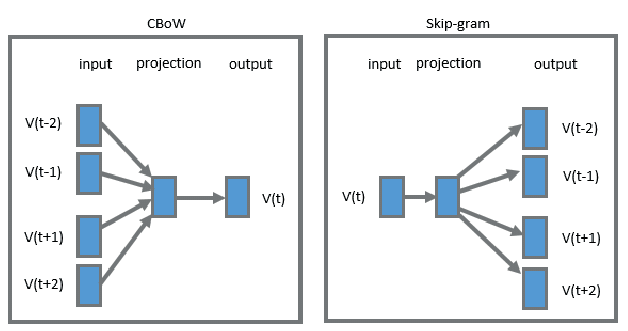

In [1]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

In [2]:
DATA_PATH = "../data/"
SEED = 42
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
df = pd.read_csv(f"{DATA_PATH}imdb_dataset.csv")
df.shape

(50000, 2)

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
target = (df["sentiment"] == "positive").astype(int).to_numpy().reshape(-1, 1)
target.shape

(50000, 1)

# 텍스트 정제

In [6]:
df["clean"] = df["review"].str.replace("[^\w ]+", "", regex=True).str.lower()

In [7]:
import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kwon3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:
from nltk.tokenize import word_tokenize

token_list = [word_tokenize(text) for text in df["clean"]]
len(token_list)

50000

# Word2Vec 클래스

In [9]:
from gensim.models import Word2Vec

In [ ]:
params = {
    "sentences": token_list, # 토큰화된 리스트 전달
    "vector_size": 64, # 단어의 임베딩 벡터 차원 크기
    "window": 5, # 윈도우 크기
    "min_count": 1, # 최소 등장 빈도수
    "seed": SEED,
    "sg": 1, # 0: CBOW, 1: Skip-gram
    "epochs": 5,
}

# emb_model = Word2Vec(**params) # 학습

- 모델 저장하기

In [ ]:
# emb_model.save(f"../output/word2vec")

- 모델 불러오기

In [12]:
emb_model = Word2Vec.load(f"../output/word2vec")

- 어휘집

In [13]:
emb_model.wv.key_to_index["air"]

943

In [14]:
emb_model.wv.index_to_key[943]

'air'

- vocab size
    - 어휘집에 등록된 토큰 개수
    - 어휘집의 크기

In [15]:
len(emb_model.wv.index_to_key)

181275

- 임베딩 벡터

In [16]:
emb_model.wv.vectors.shape

(181275, 64)

In [17]:
emb_model.wv[0]

array([-0.28390196,  0.00196141,  0.48570043, -0.07223392, -0.11772496,
       -0.11911538, -0.06702706, -0.0507977 , -0.6527193 , -0.24445911,
       -0.4129658 ,  0.16045055,  0.07078207, -0.06548169,  0.09426861,
       -0.02979098,  0.08950201,  0.54056805, -0.29346287,  0.58258724,
       -0.16679029, -0.36229768, -0.02119344, -0.25419116,  0.5519074 ,
       -0.2678599 , -0.09041721, -0.03114611,  0.12722711,  0.28735653,
       -0.2307444 , -0.15756825, -0.13491873,  0.01526793,  0.65078086,
       -0.28758705,  0.7303808 , -0.11882018, -0.07402866, -0.07789459,
       -0.20228647,  0.13758767, -0.11271273,  0.50074875, -0.32935855,
        0.5300083 ,  0.08673503, -0.1353004 ,  0.26424107, -0.5351398 ,
        0.09824339, -0.0468279 ,  0.17262082, -0.42097965, -0.36888465,
       -0.17600931,  0.39543486, -0.35563058, -0.16871336,  0.05321111,
       -0.18041366,  0.51099753,  0.21108878,  0.22341107], dtype=float32)

In [18]:
emb_model.wv["hello"]

array([-0.5863971 , -0.37028384, -0.17576347,  0.12093167,  0.27300128,
        0.00759258,  0.5171593 ,  0.20826624, -0.45066848,  0.2073874 ,
       -0.35390627,  0.29295418, -0.21549861,  0.10247996, -0.5483911 ,
       -0.19807252,  0.05663751,  1.0222356 , -0.10879755,  0.7199247 ,
       -0.0424548 ,  0.2841003 , -0.01050849, -0.5797333 ,  1.0228432 ,
       -0.43922266,  0.16036288,  0.04169599,  0.1678836 ,  0.34136772,
       -0.5656748 ,  0.09881131,  0.38367942,  0.02293254, -0.17453286,
        0.06874172,  0.30575624, -0.28425732,  0.3116517 ,  0.04625759,
       -0.15064247,  0.08805912, -0.00336766, -0.20577587,  0.29460937,
        0.47150978,  0.21582928,  0.22744365,  0.12559542, -0.6179131 ,
        0.26465   , -0.01689924, -0.4275019 , -0.26797456, -0.35234284,
       -0.40088916,  0.47762832, -0.21119094, -0.2530847 , -0.16617174,
       -0.53549594, -0.03487914, -0.5812252 ,  0.21956646], dtype=float32)

- OOV(Out of Vocabulary)
    - 단어 사전에 없다는 의미

In [20]:
# emb_model.wv["lks"]

- 유사도 계산하기

In [21]:
emb_model.wv.similarity("hello", "hi")

0.8074082

In [22]:
emb_model.wv.most_similar("hi", topn=5)

[('hello', 0.8074082136154175),
 ('reply', 0.796613872051239),
 ('dudebr', 0.7861553430557251),
 ('strait', 0.7744349837303162),
 ('luv', 0.7719062566757202)]

# 머신러닝에서 학습 가능한 데이터 만들기

In [24]:
train_vec = []

for tokens in token_list:
    vec = [emb_model.wv[t] for t in tokens if emb_model.wv.key_to_index.get(t) is not None]
    vec = np.array(vec)
    vec = vec.mean(axis=0) # 문장 임베딩 벡터 seq, feature -> feature
    train_vec.append(vec)

In [25]:
train_vec = np.array(train_vec)
train_vec.shape

(50000, 64)

In [28]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

cv = KFold(5, shuffle=True, random_state=SEED)
model = LogisticRegression(random_state=SEED)
scores = cross_val_score(model, train_vec, target.flatten(), scoring="accuracy", cv=cv)
scores.mean()

0.8604800000000001

# FastText 클래스
- 단어를 n-그램(문자 단위)으로 분해하여 학습
- OOV 문제 개선
- 단어 단위가 아닌 문자 단위의 subword 토큰화 이용
- subword 토큰들의 임베딩 합을 단어의 임베딩으로 함

```
Word2Vec 클래스와 사용법 동일
```

In [32]:
from gensim.models import FastText

params.keys()

dict_keys(['sentences', 'vector_size', 'window', 'min_count', 'seed', 'sg', 'epochs'])

In [34]:
ft_model = FastText(**params)

In [35]:
ft_model.save(f"../output/fasttext")

In [36]:
ft_model = FastText.load(f"../output/fasttext")

In [39]:
ft_model.wv.key_to_index["air"]

943

In [45]:
ft_model.wv.index_to_key[943]

'air'

In [46]:
len(ft_model.wv.index_to_key)

181275

In [48]:
ft_model.wv.vectors.shape

(181275, 64)

In [50]:
ft_model.wv.similarity("hello", "hi")

0.7393625

In [51]:
ft_model.wv.most_similar("hello", topn=5)

[('ummmhello', 0.912095308303833),
 ('sayshello', 0.9009189605712891),
 ('hehehello', 0.8997820019721985),
 ('jello', 0.8743191957473755),
 ('hellos', 0.8593059182167053)]

# RNN 레이어에 학습 가능한 데이터로 변환

In [52]:
len_list = [len(t) for t in token_list]
np.mean(len_list), np.max(len_list)

(230.25868, 2469)

In [ ]:
max_len = np.mean(len_list).astype(int)
max_len

230

In [57]:
train = []

for token in token_list:
    vec = [emb_model.wv[t] for t in token if emb_model.wv.key_to_index.get(t) is not None]
    vec = np.array(vec)[:max_len] # seq, feature

    if vec.shape[0] < max_len:
        n = max_len - vec.shape[0]
        pad_arr = np.zeros([n, vec.shape[1]])
        vec = np.concatenate([pad_arr, vec])

    train.append(vec)

train = np.array(train)
train.shape # batch, seq, feature

(50000, 230, 64)

# 데이터셋 클래스

In [58]:
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, x, y=None):
        self.x, self.y = x, y

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, i):
        item = {}
        item["x"] = torch.Tensor(self.x[i])
        if self.y is not None:
            item["y"] = torch.Tensor(self.y[i])

        return item

In [59]:
dataset = ReviewDataset(train, target)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=2)
batch = next(iter(dataloader))
batch

{'x': tensor([[[-0.2411, -0.1118,  0.6197,  ...,  0.1486,  0.2718,  0.4553],
          [-0.3747, -0.0197,  0.6945,  ...,  0.5732,  0.4229,  0.0738],
          [-0.2839,  0.0020,  0.4857,  ...,  0.5110,  0.2111,  0.2234],
          ...,
          [-0.0998, -0.5401,  0.9443,  ...,  0.3500,  0.1578,  0.1794],
          [ 0.0194, -0.1725,  0.4888,  ...,  0.1839,  0.6105,  0.0957],
          [-0.4007, -0.4648,  0.5958,  ...,  0.4373, -0.1780,  0.4222]],
 
         [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [ 0.1098, -0.0851,  0.3831,  ...,  0.3159, -0.3814,  0.5538],
          [-0.0440, -0.0442,  0.3314,  ...,  0.5700, -0.3341,  0.4157],
          [-0.2401, -0.3680,  0.5511,  ...,  0.2788,  0.0420,  0.1179]]]),
 'y': tensor([[1.],
         [1.]])}

# 모델

In [60]:
class Net(torch.nn.Module):
    def __init__(self, n_features, hidden_size):
        super().__init__()
        self.lstm = torch.nn.LSTM(n_features, hidden_size, batch_first=True)
        self.seq = torch.nn.Sequential(
            torch.nn.Linear(hidden_size, hidden_size // 2),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size // 2, 1),
        )

    def forward(self, x):
        # outputs: batch, seq, feature
        # hn, cn: nlayer, batch, feature
        outputs, (hn, cn) = self.lstm(x)
        x = hn[-1] # nlayer, batch, feature -> batch, feature
        return self.seq(x)

In [61]:
Net(64, 128)(batch["x"])

tensor([[0.0860],
        [0.0846]], grad_fn=<AddmmBackward0>)

In [62]:
def train_loop(dataloader, model, loss_function, optimizer, device):
    epoch_loss = 0
    model.train()

    for batch in dataloader:
        pred = model(batch["x"].to(device))
        loss = loss_function(pred, batch["y"].to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(dataloader)
    return epoch_loss

In [63]:
@torch.no_grad()
def test_loop(dataloader, model, loss_function, device):
    epoch_loss = 0
    model.eval()

    act = torch.nn.Sigmoid()
    pred_list = []
    for batch in dataloader:
        pred = model(batch["x"].to(device))
        if batch.get("y") is not None:
            loss = loss_function(pred, batch["y"].to(device))
            epoch_loss += loss.item()

        pred = act(pred)
        pred = pred.to("cpu").numpy()
        pred_list.append(pred)

    pred = np.concatenate(pred_list)
    epoch_loss /= len(dataloader)

    return epoch_loss, pred

In [64]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

n_splits = 5
batch_size = 32
epochs = 100
loss_function = torch.nn.BCEWithLogitsLoss()
cv = KFold(n_splits, shuffle=True, random_state=SEED)

In [66]:
is_holdout = True
reset_seeds(SEED)
score_list = []

for i, (tri, vai) in enumerate(cv.split(train)):
    # 학습 데이터
    train_dataset = ReviewDataset(train[tri], target[tri])
    train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # 검증 데이터
    valid_dataset = ReviewDataset(train[vai], target[vai])
    valid_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

    # 모델 객체 및 옵티마이저 생성
    model = Net(64, 128).to(device)
    optimizer = torch.optim.Adam(model.parameters())

    patience = 0 # 조기 종료 조건을 주기 위한 변수
    best_score = 0 # 현재 최고 점수 / mse, mae 등은 np.inf로 초기화
    for _ in range(epochs):
        train_loss = train_loop(train_dataloader, model, loss_function, optimizer, device)
        valid_loss, pred = test_loop(valid_dataloader, model, loss_function, device)
        pred = (pred > 0.5).astype(int)
        score = accuracy_score(target[vai], pred)
        print(train_loss, valid_loss, score)

        patience += 1
        if score > best_score:
            best_score = score
            patience = 0
            torch.save(model.state_dict(), f"model{i}.pt")

        if patience == 5:
            break

    score_list.append(best_score)
    print(f"ACC 최고점수: {best_score}")

    if is_holdout:
        break

0.629216926407814 0.7199189099260032 0.5466
0.49636736221313477 0.36000665784263003 0.8458
0.32239478004574773 0.3008834641819564 0.8712
0.2940542788654566 0.27914724706080013 0.879
0.2813098367333412 0.27426348895596236 0.8825
0.27039032012224196 0.2739265056463857 0.8821
0.2644698425412178 0.26944525104266004 0.8893
0.2542784500807524 0.26787514375231136 0.8874
0.2460799634039402 0.25914751018245763 0.8912
0.23721603155732154 0.2654265872658061 0.8888
0.22446547337770462 0.27086635291005096 0.89
0.21220254285037518 0.27070688361081835 0.8842
0.19819186092615126 0.27318840939254047 0.8858
0.18383837425261737 0.27600234920700517 0.8913
0.16524645713418723 0.30251810669946594 0.8847
0.14829421703368426 0.3094907393768287 0.888
0.1281518175974488 0.33793031214810787 0.8826
0.111265026031062 0.3612048732467924 0.879
0.09362281593289226 0.4047142991575951 0.8824
ACC 최고점수: 0.8913
